## Mall Customer Segmentation - Entendiendo los datos

In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [ ]:
data0 = pd.read_csv("https://raw.githubusercontent.com/NohaIhab/K-means-clustering/main/Mall_Customers.csv")
data0.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Vemos que tenemos información como el sexo y la edad de los clientes, junto con su renta anual estimada (Annual Income (k$)). También tenemos una puntuación de gasto calculada por el centro comercial (Spending Score (1-100)), que denota la cantidad de compras que el cliente ha realizado en el centro comercial: una puntuación más alta significa un gasto mayor.

In [ ]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### Para un mejor manejo renombramos las columnas Anual Income y Spending Score

In [ ]:
data0.rename({'Annual Income (k$)':'Income', \
              'Spending Score (1-100)':'Spend_score'}, axis=1, \
             inplace=True)
data0.head()

CustomerID  Gender  Age  Income  Spend_score
0           1    Male   19      15           39
1           2    Male   21      15           81
2           3  Female   20      16            6
3           4  Female   23      16           77
4           5  Female   31      17           40

In [ ]:
data0.describe()

CustomerID         Age      Income  Spend_score
count  200.000000  200.000000  200.000000   200.000000
mean   100.500000   38.850000   60.560000    50.200000
std     57.879185   13.969007   26.264721    25.823522
min      1.000000   18.000000   15.000000     1.000000
25%     50.750000   28.750000   41.500000    34.750000
50%    100.500000   36.000000   61.500000    50.000000
75%    150.250000   49.000000   78.000000    73.000000
max    200.000000   70.000000  137.000000    99.000000

* Los promedios generales muestran que la edad media del cliente es de unos 39 años y los ingresos medios son de unos 61.000 USD.
* Los ingresos máximos se sitúan en torno a los 137.000 USD. Teniendo en cuenta estos valores, no sospechamos que haya ningún valor atípico en los datos.

Esto completa una comprensión de muy alto nivel de los datos.

A continuación, empezaremos a comprender los enfoques para utilizar estos datos para la segmentación de clientes.

## Enfoques de la segmentación
Todos los grupos de marketing realizan, en efecto, algún tipo de segmentación de clientes. Sin embargo, los métodos que utilizan para ello no siempre están claros.

Pueden basarse en intuiciones y corazonadas sobre ciertos grupos demográficos, o pueden ser el resultado de algún software de marketing, donde los métodos utilizados son oscuros.

Todos los métodos posibles tienen sus ventajas y desventajas, y comprenderlas le permitirá utilizar la herramienta adecuada para el trabajo.

## Métodos tradicionales de segmentación
Uno de los métodos preferidos por los analistas de marketing consiste en elaborar agrupaciones aproximadas basadas en intuiciones y umbrales arbitrarios.

Para ello, aprovechan los datos sobre los clientes que tienen a su disposición, normalmente demográficos o de comportamiento.

Un ejemplo de esto sería decidir segmentar a los clientes en diferentes niveles de ingresos basados en incrementos de 10.000 dólares.

Otro enfoque podría consistir en observar cómo se distribuyen los valores de los atributos y buscar umbrales naturales a partir de los datos.

Para entender mejor este concepto, apliquemos un enfoque de segmentación simple a los datos de los clientes del centro comercial utilizando los ingresos de los clientes.

## Segmentación tradicional de los clientes del centro comercial
El centro comercial quiere segmentar a sus clientes y planea utilizar los segmentos encontrados para mejorar sus campañas de marketing.

El equipo comercial cree que la segmentación basada en los niveles de ingresos es pertinente para sus ofertas.

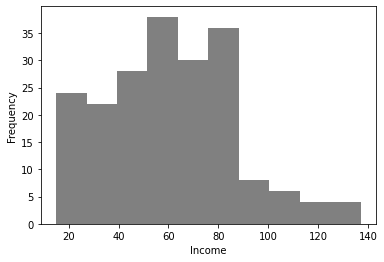

In [ ]:
data0.Income.plot.hist(color='gray')
plt.xlabel('Income')
plt.show()

* Por encima de los 90.000, la frecuencia en las franjas cae bruscamente y parece que estos clientes pueden considerarse naturalmente un grupo separado que representa a los clientes de ingresos altos.

* Una buena proporción de clientes parece situarse en la franja de 50k-90k. Estos pueden considerarse clientes de ingresos moderados.

* Los clientes que ganan menos de 40.000 dólares son clientes con ingresos bajos.

* Podemos utilizar estos límites para dividir a los clientes en tres grupos, como en la siguiente figura. Los segmentos punteados indican los umbrales.

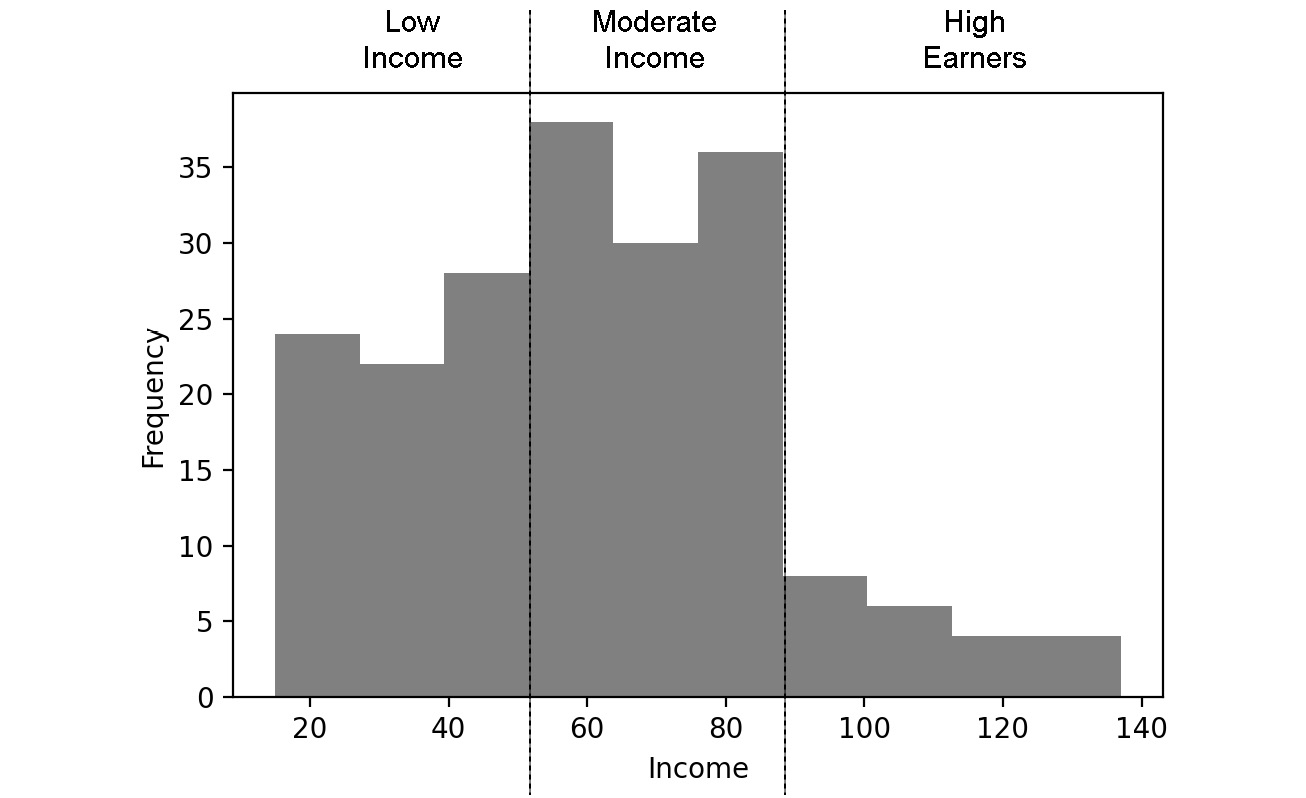

2. Creamos una columna cluster usando la segmentación por ingresos

In [ ]:
data0['Cluster'] = np.where(data0["Income"] >= 90, 'Altos Ingresos', \
                            np.where(data0["Income"] < 50, \
                            'Bajos Ingresos', 'Ingresos Medios'))

In [ ]:
data0

CustomerID  Gender  Age  Income  Spend_score         Cluster
0             1    Male   19      15           39  Bajos Ingresos
1             2    Male   21      15           81  Bajos Ingresos
2             3  Female   20      16            6  Bajos Ingresos
3             4  Female   23      16           77  Bajos Ingresos
4             5  Female   31      17           40  Bajos Ingresos
..          ...     ...  ...     ...          ...             ...
195         196  Female   35     120           79  Altos Ingresos
196         197  Female   45     126           28  Altos Ingresos
197         198    Male   32     126           74  Altos Ingresos
198         199    Male   32     137           18  Altos Ingresos
199         200    Male   30     137           83  Altos Ingresos

[200 rows x 6 columns]

In [ ]:
data0.groupby('Cluster')['Income'].describe()

count        mean        std   min    25%    50%     75%  \
Cluster                                                                     
Altos Ingresos    22.0  108.181818  13.661334  93.0  98.25  103.0  118.25   
Bajos Ingresos    72.0   33.027778  11.091136  15.0  22.50   33.5   43.00   
Ingresos Medios  106.0   69.377358  10.651584  50.0  61.00   70.0   78.00   

                   max  
Cluster                 
Altos Ingresos   137.0  
Bajos Ingresos    49.0  
Ingresos Medios   88.0

* Los valores máximos y mínimos de cada grupo confirman que los grupos se han definido como pretendíamos. La mayoría de los clientes se encuentran en el clúster de ingresos moderados. También puede ver que sólo 22 clientes están marcados como de ingresos altos.

* Con esto hemos creado nuestra primera segmentación de clientes, sencilla pero extremadamente útil que el equipo de marketing pueda usar para crear un impacto comercial.

* Este tipo de métodos tienen la ventaja de ser simples y fáciles de entender. Sin embargo, la segmentación mediante enfoques tradicionales se vuelve mucho más compleja cuando se añaden más variables como la edad, el sexo, otra información demográfica relevante u otros atributos relevantes identificados por la empresa.

* Es importante destacar que, a medida que se aumenta el número de variables, resulta difícil elegir los umbrales de manera que no se acabe con grupos con muy pocos clientes en ellos. Por ejemplo, ¿cuántos individuos habría en el grupo de 18 a 25 años que ganan más de 100.000 dólares?

* Esto se vuelve más importante cuando se observan los datos de comportamiento de los clientes.
* La creación de grupos basados en la intuición puede hacer que se pasen por alto patrones subyacentes en los datos. Por ejemplo, puede haber segmentos de la población que respondan bien a tipos muy específicos de ofertas de marketing.
* Si el analista que realiza la segmentación no conoce este grupo específico y los tipos de anuncios a los que responden los clientes del grupo, el analista puede dejar de capturarlos como un grupo único. Por ejemplo, un analista de marketing que separa a los clientes en aquellos que responden a las ofertas de productos caros y aquellos que responden a las ofertas de productos baratos podría pasar por alto un grupo de clientes sólo interesados en productos electrónicos, independientemente de si son caros o baratos.

* Otra consideración importante es que incluso el ser humano más cuidadoso puede introducir sesgos inconscientes derivados de su intuición o experiencia.

* Estas consideraciones hacen necesario un enfoque de la segmentación basado en el aprendizaje automático.

# **Aprendizaje no supervisado (clustering) para la segmentación de clientes**
Otro método para llevar a cabo la segmentación de clientes es utilizar el aprendizaje automático no supervisado. Suele ser una técnica muy potente, ya que tiende a detectar patrones en los datos que, de otro modo, podrían pasarse por alto.

Es perfecta para la segmentación de clientes porque encuentra los puntos de datos que más se parecen entre sí y los agrupa.

El clusterizado es un tipo de técnica de aprendizaje automático no supervisado que busca grupos o clusters en los datos sin conocerlos de antemano.

**Estas son las ventajas de clusterizar:**

* Puede encontrar grupos de clientes inesperados o desconocidos para el analista
* Es flexible y puede utilizarse para una amplia gama de datos
*Reduce la necesidad de conocimientos profundos sobre las conexiones entre los datos demográficos de los clientes y los comportamientos
Rápido de realizar; escalable a conjuntos de datos muy grandes

**Estas son las desventajas de clusterizar:**

* Los grupos de clientes creados pueden no ser fácilmente interpretables.
*Si los datos no se basan en el comportamiento del consumidor (como los productos o servicios adquiridos), puede que no esté claro cómo utilizar los grupos encontrados.

# Selección de atributos relevantes (criterios de segmentación)
Para utilizar el clustering para la segmentación de clientes (para agrupar a los clientes con otros que tienen rasgos similares), primero hay que decidir qué significa similar, o en otras palabras, hay que ser preciso a la hora de definir qué tipos de clientes son similares.

La elección de las propiedades que entran en el proceso de segmentación es una decisión extremadamente importante, ya que define cómo se representan las entidades y dirige la naturaleza de los grupos formados.

Supongamos que deseamos segmentar a los clientes únicamente por su frecuencia de compra y el valor de las transacciones.

En tal situación, atributos como la edad, el sexo u otros datos demográficos no serían relevantes. Por otro lado, si la intención es segmentar a los clientes únicamente por su carácter demográfico, su frecuencia de compra y el valor de las transacciones serían los atributos que no serían relevantes para nosotros.

Un buen criterio de segmentación podría ser el compromiso del cliente, que implica características como el tiempo de permanencia en el sitio, las visitas a la plataforma en un periodo de tiempo definido, las páginas vistas en un sitio web, los días transcurridos desde el último inicio de sesión, etc.

Para nuestro caso de estudio, decidamos los criterios de segmentación. Independientemente de la edad, digamos que deseamos separar a los clientes en función de su nivel de ingresos y de su puntuación de gasto. Utilizando estos criterios, podríamos tener una estrategia de marketing diferencial para los clientes que tienen, digamos, ingresos altos y puntuaciones de gasto bajas frente a los que tienen ingresos bajos y puntuaciones de gasto altas.

Una vez decididos los criterios de segmentación, es decir, elegidos los atributos relevantes, vamos a entender algunos conceptos clave que permiten el proceso de agrupación.


##  Estandarizando la data de los clientes
Para poder agrupar a los clientes en función de las variables continuas, primero tenemos que reescalar estos parámetros de forma que los datos estén en escalas similares. **¿Por qué?**

La estandarización garantiza que todas las variables tengan una influencia similar en la formación de clusters.

Aunque se trata de una práctica estándar, en situaciones empresariales debe evaluar si todas las variables que tienen una influencia similar se ajustan a los requisitos de la empresa.

Basado en el conocimiento del negocio y el objetivo, a veces puede querer que ciertas variables dirijan e influyan en los clusters más que las otras. Esto se puede conseguir simplemente manteniendo estas variables en una escala diferente a las demás.

In [ ]:
from sklearn.preprocessing import StandardScaler #MinMaxScaler
scaler = StandardScaler()

In [ ]:
cols_to_scale = ['Age', 'Income', 'Spend_score']

In [ ]:
data_scaled = data0.copy()

In [ ]:
data_scaled[cols_to_scale] = scaler.fit_transform(data0[cols_to_scale])

In [ ]:
data_scaled[cols_to_scale].describe()

Age        Income   Spend_score
count  2.000000e+02  2.000000e+02  2.000000e+02
mean  -1.021405e-16 -2.131628e-16 -1.465494e-16
std    1.002509e+00  1.002509e+00  1.002509e+00
min   -1.496335e+00 -1.738999e+00 -1.910021e+00
25%   -7.248436e-01 -7.275093e-01 -5.997931e-01
50%   -2.045351e-01  3.587926e-02 -7.764312e-03
75%    7.284319e-01  6.656748e-01  8.851316e-01
max    2.235532e+00  2.917671e+00  1.894492e+00

# Calculando la distancia entre clientes

**¿ Qué es una distancia estadística ?** Es una forma de determinar la similitud entre dos variables aleatorias con cierto número de características

El objetivo es conseguir que los datos de cada clúster sean lo más parecidos posible entre ellos y lo más diferentes que se pueda con relación a los otros grupos

https://economipedia.com/definiciones/analisis-cluster.html

https://numerics.mathdotnet.com/Distance.html


## Usando k-means para hacer cluster de clientes

K-Means es una técnica de aprendizaje no supervisado, es poderosa porque es conceptualmente simple, se adapta a conjuntos de datos muy grandes y tiende a funcionar bien en la práctica.



El clustering de K-means es un algoritmo que trata de encontrar la mejor manera de agrupar los puntos de datos en k grupos diferentes, donde k es un parámetro dado al algoritmo.

**Por ahora, elegiremos k de forma arbitraria.**

El algoritmo trabaja entonces de forma iterativa para tratar de encontrar la mejor agrupación.

Hay que tener en cuenta que en este algoritmo el resultado depende de las ubicaciones iniciales de los centroides.

Por lo tanto, no siempre se garantiza que se encuentre la mejor agrupación. Sin embargo, en la práctica, tiende a encontrar buenas agrupaciones y sigue siendo poco costoso desde el punto de vista informático, incluso para grandes conjuntos de datos.

El clustering de K-means es rápido y fácilmente escalable y es, por tanto, el algoritmo de clustering más utilizado.

In [ ]:
cluster_cols = ['Income', 'Spend_score']
data_scaled[cluster_cols].head(3)

Income  Spend_score
0 -1.738999    -0.434801
1 -1.738999     1.195704
2 -1.700830    -1.715913

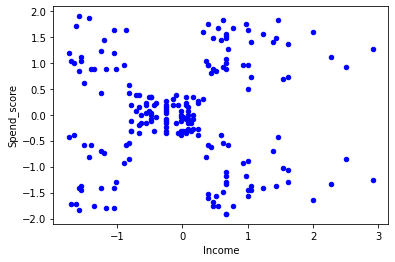

In [ ]:
data_scaled.plot.scatter(x='Income', y='Spend_score', \
                         color='blue')
plt.show()

Según el gráfico, parece que hay 5 cluster naturales en los datos. Esto nos indica que debemos especificar 5 como número de clusters para el algoritmo de k-means.

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=42)

In [ ]:
model.fit(data_scaled[cluster_cols])

data_scaled['Cluster'] = model.predict(data_scaled[cluster_cols])

In [ ]:
model.predict(data_scaled[cluster_cols])

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [ ]:
data_scaled.head()

CustomerID  Gender       Age    Income  Spend_score  Cluster
0           1    Male -1.424569 -1.738999    -0.434801        2
1           2    Male -1.281035 -1.738999     1.195704        3
2           3  Female -1.352802 -1.700830    -1.715913        2
3           4  Female -1.137502 -1.700830     1.040418        3
4           5  Female -0.563369 -1.662660    -0.395980        2

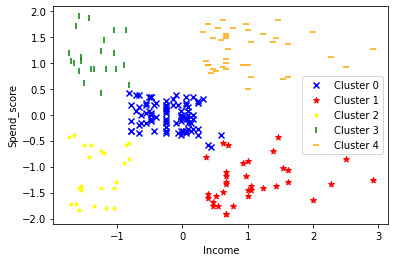

In [ ]:
markers = ['x', '*', '.','|','_']
colores = ["blue","red","yellow","green","orange"]

for clust in range(5):
    temp = data_scaled[data_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, \
                marker=markers[clust], \
                c=colores[clust],\
                label="Cluster "+str(clust))
plt.xlabel('Income')
plt.ylabel('Spend_score')
plt.legend()
plt.show()

# Comprender y describir los clusters
* Los analistas de marketing deben comprender claramente estos clusters para poder explicarlos a las distintas partes interesadas de la empresa.

* Como ya se ha mencionado, las partes interesadas de la empresa desempeñan un papel fundamental en el ejercicio de segmentación al revisar los segmentos desde una perspectiva empresarial.

* Para entender los clusters, un enfoque sencillo es estudiar las diversas características de los clientes de cada cluster.

* Para ello, no es necesario limitarse a las características que se han incluido en la agrupación. De hecho, complementar el análisis con otras características relevantes nos ayuda a comprender mejor los segmentos de clientes y su comportamiento.

* Esta comprensión debe transmitirse a la empresa. Además, dado que la empresa se referirá a los clusters una y otra vez, debemos asegurarnos de etiquetar y describir mejor estos segmentos.

Para entender mejor las características de los clusters, analizaremos las características en la escala original y no las características estandarizadas.

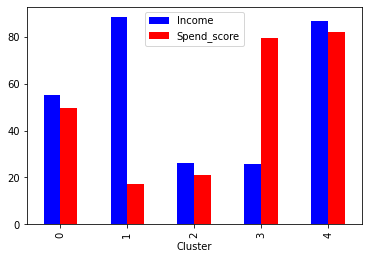

In [ ]:
data0['Cluster'] = data_scaled["Cluster"]

data0.groupby('Cluster')[['Income', 'Spend_score']].mean().plot.bar(color=['blue','red'])

plt.show()

**Grupo 0:** Gastadores moderados de ingresos moderados

**Grupo 1:** Personas con rentas altas que gastan poco

**Grupo 2:** Personas con ingresos bajos que gastan poco

**Grupo 3:** Personas con ingresos bajos que gastan mucho

**Clúster 4:** Gastadores de ingresos altos

**Nota**

El orden de los clústeres que observamos en nuestros cuadernos podría ser diferente al mostrado en panalla. Esto se debe a una cierta aleatoriedad debida al algoritmo k-means. No obstante, aunque los números/órdenes de los clusters pueden ser diferentes, debería obtener clusters con las mismas características y el resultado global debería ser similar.

Además, puedes asignar a estos grupos nombrescreativos  que capten la esencia de su comportamiento. Esto ayuda a registrar y transmitir mejor la comprensión y es simplemente más fácil de trabajar.

**Pongamos nombres creativos para estos segmentos.**

**Nota: Buyer Persona**

Otro enfoque útil es asignar personas a cada segmento, es decir, representar cada segmento de clientes con una personalidad imaginaria.

El personaje tiene un nombre y algunos atributos que ayudan a entender su personalidad.

Como ejemplo, `el grupo 2` del ejercicio anterior podría ser representado por "Juan Pueblo". Juan Pueblo es la quintaesencia del "cliente medio", cuyo nivel de ingresos se sitúa en la media, al igual que su gasto. No gasta por encima de sus posibilidades. Dar un nombre y una personalidad ayuda a consolidar la comprensión del segmento en una persona única e imaginaria, que es mucho más fácil de recordar que los valores de los atributos del segmento.

Este paso clave completa el ejercicio de segmentación. Esta comprensión se presenta a los consumidores de la empresa, que, como se ha mencionado anteriormente, suelen tener algunos comentarios que se pueden incorporar, lo que conduce a segmentos más refinados.

# **Más información del Cluster**

In [ ]:
cluster0 = data0[data0['Cluster']==0][["Gender","Age","Income","Spend_score"]]
cluster0["Spend_score"] = pd.Categorical(cluster0["Spend_score"])

In [ ]:
cluster0.describe(include="all")

Gender        Age     Income  Spend_score
count       81  81.000000  81.000000         81.0
unique       2        NaN        NaN         24.0
top     Female        NaN        NaN         42.0
freq        48        NaN        NaN          8.0
mean       NaN  42.716049  55.296296          NaN
std        NaN  16.447822   8.988109          NaN
min        NaN  18.000000  39.000000          NaN
25%        NaN  27.000000  48.000000          NaN
50%        NaN  46.000000  54.000000          NaN
75%        NaN  54.000000  62.000000          NaN
max        NaN  70.000000  76.000000          NaN

In [ ]:
cluster1 = data0[data0['Cluster']==3][["Gender","Age","Income","Spend_score"]]
cluster1["Spend_score"] = pd.Categorical(cluster1["Spend_score"])

In [ ]:
cluster1.describe(include="all")

Gender        Age     Income  Spend_score
count       22  22.000000  22.000000         22.0
unique       2        NaN        NaN         16.0
top     Female        NaN        NaN         73.0
freq        13        NaN        NaN          4.0
mean       NaN  25.272727  25.727273          NaN
std        NaN   5.257030   7.566731          NaN
min        NaN  18.000000  15.000000          NaN
25%        NaN  21.250000  19.250000          NaN
50%        NaN  23.500000  24.500000          NaN
75%        NaN  29.750000  32.250000          NaN
max        NaN  35.000000  39.000000          NaN